# What's the best 3 point shooting strategy for NBA teams to make the playoffs?

We know the game of basketball has changed in recent years because of higher volumes of 3 point shooting. Due to players like Steph Curry and teams like the Golden State Warriors, 3 point shooting appears to be a must for teams to excel in the NBA. The question is, what strategy of shooting is best? Should teams try to shoot as many 3 pointers as possible each game? Or should teams try to only shoot 3 pointers when they are quality shots?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

First, let's take a look at the data for team stats per game

In [2]:
team_stats_per_game = pd.read_csv('Team_Stats_Per_Game.csv')
team_stats_per_game

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2025,NBA,Atlanta Hawks,ATL,False,5.0,240.0,39.6,85.6,0.463,...,0.776,10.8,31.8,42.6,26.8,10.4,6.2,16.6,22.4,117.6
1,2025,NBA,Boston Celtics,BOS,False,5.0,245.0,43.0,94.2,0.456,...,0.817,11.6,31.4,43.0,24.0,7.8,4.4,11.2,17.4,125.8
2,2025,NBA,Brooklyn Nets,BRK,False,5.0,245.0,40.8,88.2,0.463,...,0.826,9.4,31.0,40.4,26.0,7.6,4.0,15.6,29.2,118.0
3,2025,NBA,Chicago Bulls,CHI,False,5.0,240.0,40.2,91.6,0.439,...,0.723,9.8,41.8,51.6,27.6,6.2,3.2,16.2,16.6,113.4
4,2025,NBA,Charlotte Hornets,CHO,False,4.0,240.0,40.8,91.0,0.448,...,0.782,16.5,31.8,48.3,23.3,7.0,6.8,17.8,24.3,118.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,1947,BAA,Providence Steamrollers,PRO,False,60.0,NaN,27.2,93.0,0.292,...,0.655,NaN,NaN,NaN,8.0,NaN,NaN,NaN,20.3,72.5
1872,1947,BAA,St. Louis Bombers,STB,True,61.0,NaN,26.2,96.3,0.272,...,0.616,NaN,NaN,NaN,4.8,NaN,NaN,NaN,20.2,66.6
1873,1947,BAA,Toronto Huskies,TRH,False,60.0,NaN,25.3,94.5,0.267,...,0.622,NaN,NaN,NaN,7.7,NaN,NaN,NaN,21.2,66.6
1874,1947,BAA,Washington Capitols,WSC,True,60.0,NaN,28.7,96.6,0.297,...,0.706,NaN,NaN,NaN,6.3,NaN,NaN,NaN,19.1,73.8


Let's only grab the relevent 3 point information columns, the team names, and whether the teams made the playoffs or not. Let's also exclude the league average data. Let's only take a look at the data for the last season (2023-2024) which consisted the 30 NBA teams that each played 82 games.

In [3]:
team_stats_per_game = team_stats_per_game[team_stats_per_game['team']!='League Average']
team_stats_per_game_2015 = team_stats_per_game[team_stats_per_game['season']==2024]
final_df = team_stats_per_game_2015[['team','playoffs','x3p_per_game','x3pa_per_game','x3p_percent']]
final_df

,team,playoffs,x3p_per_game,x3pa_per_game,x3p_percent
31,Atlanta Hawks,False,13.7,37.7,0.364
32,Boston Celtics,True,16.5,42.5,0.388
33,Brooklyn Nets,False,13.3,36.7,0.362
34,Chicago Bulls,False,11.5,32.1,0.358
35,Charlotte Hornets,False,12.1,34.0,0.355
36,Cleveland Cavaliers,True,13.5,36.8,0.367
37,Dallas Mavericks,True,14.6,39.5,0.369
38,Denver Nuggets,True,11.7,31.2,0.374
39,Detroit Pistons,False,11.0,31.7,0.348
40,Golden State Warriors,False,14.8,38.9,0.380


Let's take a look at a scatterplot of 3 point attempts per game and the 3 point percentage per game for each team and how that may have affected whether the team made the playoffs or not.

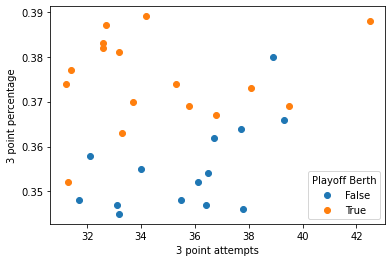

In [4]:
fig, ax = plt.subplots()
for category in final_df['playoffs'].unique():
    df_subset = final_df[final_df['playoffs'] == category]
    ax.scatter(df_subset['x3pa_per_game'], df_subset['x3p_percent'], label=category)

ax.set_xlabel('3 point attempts')
ax.set_ylabel('3 point percentage')
ax.legend(title='Playoff Berth')
plt.show()

It appears that 3 point percentage per game is much more indicative of whether a team made the playoffs or not compared to 3 point attempts per game because the color change looks like it only happens based on the y-axis change in value.

Now let's take a look at 3 pointers made per game and 3 point percentage per game and see whether that affects if a team makes the playoffs or not.

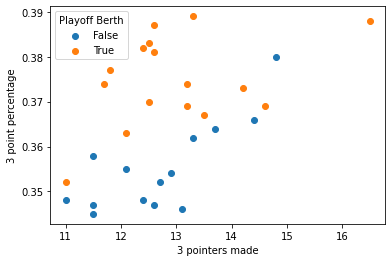

In [5]:
fig, ax = plt.subplots()
for category in final_df['playoffs'].unique():
    df_subset = final_df[final_df['playoffs'] == category]
    ax.scatter(df_subset['x3p_per_game'], df_subset['x3p_percent'], label=category)

ax.set_xlabel('3 pointers made')
ax.set_ylabel('3 point percentage')
ax.legend(title='Playoff Berth')
plt.show()

While 3 pointers made looks like it has a bit more of an affect on whether a team makes the playoffs than 3 point attempts, the 3 point percentage is still a much greater indicator.

Now let's take a look at 3 pointers made per game and 3 point attempts per game and see how they determine whether a team makes the playoffs.

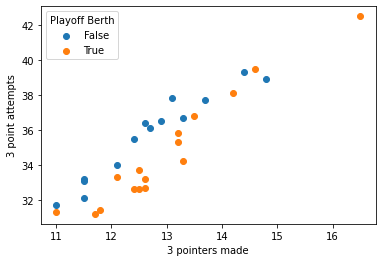

In [6]:
fig, ax = plt.subplots()
for category in final_df['playoffs'].unique():
    df_subset = final_df[final_df['playoffs'] == category]
    ax.scatter(df_subset['x3p_per_game'], df_subset['x3pa_per_game'], label=category)

ax.set_xlabel('3 pointers made')
ax.set_ylabel('3 point attempts')
ax.legend(title='Playoff Berth')
plt.show()

Looking at this plot, it appears that slightly less 3 point attempts with more 3 pointers made leads to teams making the playoffs. This is consistent with the other plots because a higher percentage was more indicative of teams making the playoffs than the other 3 point statistics.

In conclusion, the data clearly shows that the most important 3 point shooting metric is percentage. So while it may help to shoot more 3 pointers for teams to make the playoffs, it is more important that the teams shoot quality looks to increase the percentage of 3 pointers that are actualy made. The only problem is there may be some teams that are outliers for various reasons. Maybe there is an individual on a team that is an especially good 3 point shooter and shoots the most on a team. This may increase 3 point attempts and slightly lower percentages and cause deviations in the data. There may also be teams that are good 3 point shooters, but are very bad at another team characteristic like defense which results in them not making the playoffs even though they have a good 3 point percentage per game. One thing that could be better for this research in the future would be to include defensive 3 point statistics. For example, the average 3 point percentage allowed by the other team per game. There are going to be exceptions for certain teams, but in general it seems best that teams strive for high percentage 3 point shooting.